# Punktkälla

I den här första uppgiften ska vi bestämma dosraten från en punktformig källa med given styrka (intensitet) och $\gamma$-energi.

Flödet $\phi$ på avståndet $R$ från källan ges av $$\phi = \frac{S}{4\pi R^2},$$ där $S$ är källans intensitet (antal utsända $\gamma$-fotoner per sekund). Detta samband beskriver alltså hur flödet avtar med *avståndet i kvadrat*.

Dosraten $D_0$ från $\gamma$-fotonerna ges av sambandet $$D_0 = K\phi,$$ där $\phi$ är flödet av $\gamma$-fotoner och $K$ är en omvandlingsfaktor som beror på energi och fås från tabeller. I ert fall kan $K$ läsas ut från Figur 14.14 i kompendiet.

Om källan skärmas behöver flödet (och därför också dosraten) korrigeras enligt Bergers ekvation: $$B = 1 + C\mu x\cdot \exp[D\mu x],$$ där $x$ är tjockleken på skärmningen, $\mu$ är den linjära dämpningskoefficienten för skärmen och $C$ och $D$ är parametrar som beror på skärmens material och $\gamma$-fotonens energi. Också dämpningskoefficienten beror på skärmens material och $\gamma$-fotonens energi. I ert fall kan $\mu$ läsas ut från bilaga 1 i kompendiet och $C$ och $D$ från bilaga 7 i kompendiet.

### Exempel: ingen skärmning

Vi börjar med att titta på hur flödet $\phi$ och dosraten $D_0$ avtar med avstånd från källan, i avsaknad av skärmning.

Vi antar här att källan har en styrka på $S = 10^6$ fotoner per sekund och att fotonenergin är 500 keV. Från Figur 14.14 i kompendiet utläser vi att $K \approx 1,2\cdot10^{-5}$ mSv/h per fotoner/(cm$^2$ s). Detta betyder att ett flöde på $\phi = 1$ cm$^{-2}$ s$^{-1}$ ger en dosrat $D_0 = 1,2\cdot10^{-5}$ mSv/h.

Nu kan vi räkna ut flödena och dosraterna vid ett antal avstånd från källan. För att köra uträkningen, klicka på cellen med koden och sedan på pilen ("run") längst upp på skärmen.

(0.0, 100.0)

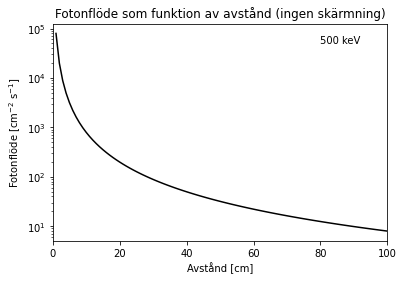

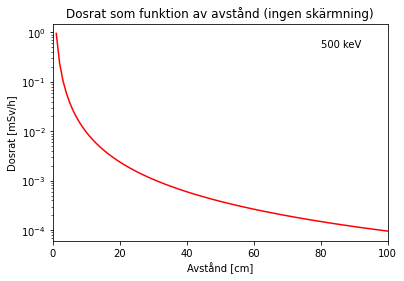

In [23]:
import numpy as np
import matplotlib.pyplot as plt

S = 1e6       # källan har en intensitet på 10^6 = 1e6 fotoner per sekund.
K = 1.2e-5    # utläst från Figur 14.14 enligt ovan.

R = np.linspace(1, 100, 100)        # skapa en lista med värden på avståndet från källan som ska undersökas. Listan går från 1 till 100 cm.

# Räkna först ut och rita upp flödet som funktion av R
phi_punkt = S/(4.*np.pi*np.power(R, 2))   # Räkna ut flödet för alla R i listan ovan.

plt.figure()
plt.plot(R, phi_punkt, color='black')         # rita graf av flödet som funktion av avståndet
plt.yscale('log')        # logaritmisk y-skala (för bättre visualisering)
plt.xlabel('Avstånd [cm]')
plt.ylabel('Fotonflöde [cm$^{-2}$ s$^{-1}$]')
plt.title('Fotonflöde som funktion av avstånd (ingen skärmning)')
plt.text(80, 5e4, '500 keV')
plt.xlim(0, 100)

# Räkna sedan ut och rita upp dosraten som funktion av R
D0_punkt = K*phi_punkt   # Räkna ut dosraten för alla flöden ovan.

plt.figure()
plt.plot(R, D0_punkt, color='red')         # rita graf av dosraten som funktion av avståndet
plt.yscale('log')        # logaritmisk y-skala (för bättre visualisering)
plt.xlabel('Avstånd [cm]')
plt.ylabel('Dosrat [mSv/h]')
plt.title('Dosrat som funktion av avstånd (ingen skärmning)')
plt.text(80, 5e-1, '500 keV')
plt.xlim(0, 100)

Vi ser tydligt hur både flödet och dosraten avtar med avståndet. Om vi hade lagt till skärmning hade två effekter påverkat flödet och dosraten:
- Dämpning i skärmningen enligt $\exp[-\mu x]$.
- Uppbyggnad i skärmningen med faktorn $B$ från Bergers ekvation.

### Uppgift: dosrat bakom skärmning

Ni ska nu bestämma dosraten (i mSv/h) på avståndet $L$ = 2 m från en punktformig källa som har styrkan $3,7\cdot 10^{14}$ s$^{-1}$ och energin 1,25 MeV.

Källan skärmas med en vägg av betong med tjockleken $T$:
- 60 cm
- 100 cm
- 0 cm (ingen skärmning)

Studera hur dosraten varierar när man rör sig utefter en linje som är parallell med skärmen enligt följande figur:
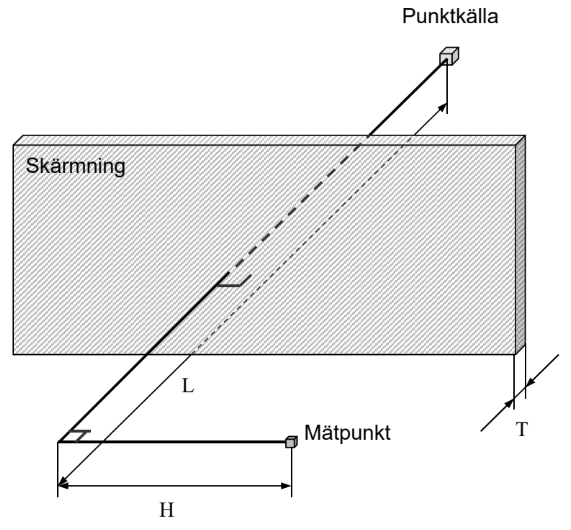

Först och främst behöver ni definiera ett antal parametrar för uträkningen. Detta gör ni i cellen nedan. Notera att om ni uppdaterar något värde måste ni köra om denna *och efterföljande* celler för att förändringen ska gälla.

In [24]:
S = 3.7e14         # fyll i S (källstyrkan, antal fotoner per sekund)
L = 500         # fyll i L (avstånd mellan källan och linjen vi mäter längs, cm)
T = 8         # fyll i T (skärmens tjocklek, cm)
K = 1e-5         # fyll i K (omvandlingsfaktor flöde -> dosrat, mSv/h per cm^-2 s^-1)
mu = 0.3        # fyll i my (linjär dämpningskoefficient för skärmens material, cm^-1)
C = 2         # fyll i C (parameter i Bergers ekvation)
D = 0.1         # fyll i D (parameter i Bergers ekvation)

H:
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150]
D0:
[758.79683958 758.29102237 756.77643851 754.26165498 750.76082942
 746.29353218 740.88450261 734.56334531 727.36417269 719.32520155
 710.48831203 700.89857763 690.60377537 679.65388514 668.10058668
 655.99676267]


(0.0, 150.0)

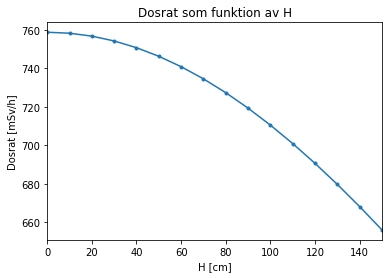

In [25]:
import numpy as np
import matplotlib.pyplot as plt


H = np.arange(0, 160, 10)           # vi vill undersöka dosraten vid H från 0 till 150 cm, i steg om 10 cm.

R = np.sqrt(np.power(L, 2) + np.power(H, 2))         # för varje H räknas det faktiska avståndet till källan ut.

# Vi behöver nu räkna ut hur lång sträcka X fotonerna färdas genom skärmen (detta är olika långt beroende på vad H är)
# Likformig triangel med sidorna L och R som triangeln med sidorna T och X. Alltså: L/R = T/X => X = (T/L)*R.

X = (T/L)*R


# Uppbyggnadsfaktor (Berger):
B = 1 + C*mu*X*np.exp(D*mu*X)

# Flöde (korrigerat för uppbyggnadsfaktor B):
phi = (S/(4.*np.pi*np.power(R, 2)))*B*np.exp(-mu*X)


# Dosrat:
D0 = K*phi

print('H:')
print(H)
print('D0:')
print(D0)

# Rita graf över dosraten som funktion av H
plt.plot(H, D0, marker='.')
plt.xlabel('H [cm]')
plt.ylabel('Dosrat [mSv/h]')
plt.title('Dosrat som funktion av H')
plt.xlim(0, 150)

I utdatan ovan ser ni de beräknade dosraterna vid de givna värdena på H. För in de beräknade dosraterna i tabellen nedan. Upprepa sedan uträkningen för nästa fall av skärmens tjocklek, och slutligen utan skärmning. Be en lärare kontrollera dina resultat när tabellen är ifylld.

| $H$ [cm] | $D_0$ [mSv/h], $T$ = 60 cm | $D_0$ [mSv/h], $T$ = 100 cm | $D_0$ [mSv/h], $T$ = 0 cm |
| -------- | -------------------------- | --------------------------- | ------------------------- |
| 0        |                            |                             |                           |
| 10       |                            |                             |                           |
| 20       |                            |                             |                           |
| 30       |                            |                             |                           |
| 40       |                            |                             |                           |
| 50       |                            |                             |                           |
| 60       |                            |                             |                           |
| 70       |                            |                             |                           |
| 80       |                            |                             |                           |
| 90       |                            |                             |                           |
| 100      |                            |                             |                           |
| 110      |                            |                             |                           |
| 120      |                            |                             |                           |
| 130      |                            |                             |                           |
| 140      |                            |                             |                           |
| 150      |                            |                             |                           |

# Linjekälla
I den här andra uppgiften ska vi bestämma dosraten från en långsträckt källa (linjekälla) med given styrka (intensitet) och $\gamma$-energi.

Vi kommer att beskriva linjekällan som en serie "punktkällor" som placerats efter varandra på en linje. Från varje sådant segment kan vi räkna ut dosraten enligt föregående uppgift. Det som återstår är då att summera bidragen från samtliga segment i mätpunkten.

### Exempel: ingen skärmning

Vi börjar med att titta på hur flödet $\phi$ och dosraten $D_0$ avtar med avstånd från källan, i avsaknad av skärmning.

Vi antar här att källan är $L_1$ cm lång och har en styrka på $S = 3333$ fotoner per sekund per cm (vi delar in linjekällan i segment) och att fotonenergin är 500 keV. Från Figur 14.14 i kompendiet utläser vi att $K \approx 1,2\cdot10^{-5}$ mSv/h per fotoner/(cm$^2$ s).

Notera att vi alltså delar in linjekällan i $N_\text{segment}$ segment, där varje segment är $L_3 = \frac{L_1}{N_\text{segment}}$ cm långt. Från detta får vi den totala källstyrkan per segment ($S\cdot L_3$). I uträkningen betraktas sedan varje segment som en individuell punktkälla, för vilken vi vet hur man räknar ut flödet och dosraten vid en given punkt. Detta är en approximation som blir bättre ju större värde på $N_\text{segment}$ som används.

Nu kan vi räkna ut flödena och dosraterna vid ett antal avstånd från källan.

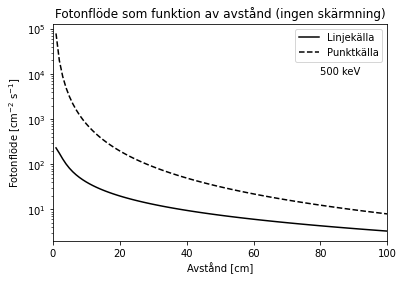

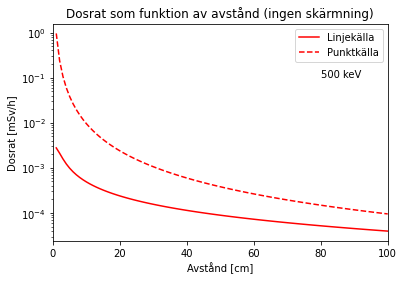

In [26]:
import numpy as np
import matplotlib.pyplot as plt

S = 3333       # varje segment har en intensitet på 10^6 = 1e6 fotoner per sekund per cm.
L1 = 300      # linjekällans längd (cm)
N_segment = 60        # antal segment som linjekällan delas in i för uträkningen.
L3 = L1/N_segment    # längd på varje segment i uträkningen
K = 1.2e-5    # utläst från Figur 14.14 enligt ovan.

H = np.linspace(1, 100, 100)        # skapa en lista med värden på avståndet från källan som ska undersökas. Listan går från 1 till 100 cm.
phi_linje = np.zeros(len(H))                             # Initialisera flödet till 0

for segment_no in range(N_segment):            # Räkna ut bidraget till dosen från varje segment av källan
    Segment_mittpunkt = L3*segment_no + L3/2.     # mittpunkten för det aktuella segmentet. Detta är där "punktkällan" i approximationen ligger.

    R = np.sqrt(np.power(H, 2) + np.power(Segment_mittpunkt-0, 2))         # räkna ut det faktiska avståndet mellan mätning och "punktkälla". I det här fallet är mätningens position i x-led alltid 0 (därav -0)

    
    # Flöde (bidrag från det aktuella segmentet):
    phi_segment = (S*L3/(4.*np.pi*np.power(R, 2)))      # multiplicera S med segmentets längd för att få emission för hela "punktkällan"


    phi_linje += phi_segment                  # Addera bidraget från det aktuella segmentet till det totala flödet.
    
    
# Total dosrat:
D0_linje = K*phi_linje

plt.figure()
plt.plot(H, phi_linje, color='black', label='Linjekälla')         # rita graf av flödet som funktion av avståndet
plt.plot(H, phi_punkt, color='black', linestyle='--', label='Punktkälla')         # rita graf av flödet som funktion av avståndet
plt.yscale('log')        # logaritmisk y-skala (för bättre visualisering)
plt.xlabel('Avstånd [cm]')
plt.ylabel('Fotonflöde [cm$^{-2}$ s$^{-1}$]')
plt.title('Fotonflöde som funktion av avstånd (ingen skärmning)')
plt.text(80, 1e4, '500 keV')
plt.xlim(0, 100)
plt.legend()

# Räkna sedan ut och rita upp dosraten som funktion av R
D0 = K*phi   # Räkna ut dosraten för alla flöden ovan.

plt.figure()
plt.plot(H, D0_linje, color='red', label='Linjekälla')         # rita graf av dosraten som funktion av avståndet
plt.plot(H, D0_punkt, color='red', linestyle='--', label='Punktkälla')         # rita graf av dosraten som funktion av avståndet
plt.yscale('log')        # logaritmisk y-skala (för bättre visualisering)
plt.xlabel('Avstånd [cm]')
plt.ylabel('Dosrat [mSv/h]')
plt.title('Dosrat som funktion av avstånd (ingen skärmning)')
plt.text(80, 1e-1, '500 keV')
plt.xlim(0, 100)
plt.legend()

Vi ser fortfarande hur flödet och dosraten avtar med avståndet. Här jämför vi också flödet och dosraten för en punktkälla med styrkan $10^6$ per sekund och en 300 cm lång linjekälla med styrkan 3333 per sekund (alltså en total källstyrka på $10^6$ per sekund). 

Vi noterar då att det uppmätta flödet och dosraten är lägre för linjekällan än för punktkällan, eftersom avståndet mellan mätpunkten och de punkter på linjekällan också avtar ju längre från mitten på källan vi ser.

### Uppgift: dosrat bakom skärmning

En 3 m lång linjekälla med styrkan $10^{12}$ fotoner/(cm$^2 s) och med energin 2 MeV skall skärmas så att dosraten 2 m från källan ej överstiger 50 mSv/h. Hur tjock skall skärmen vara om den består av:
- bly
- järn
- betong?

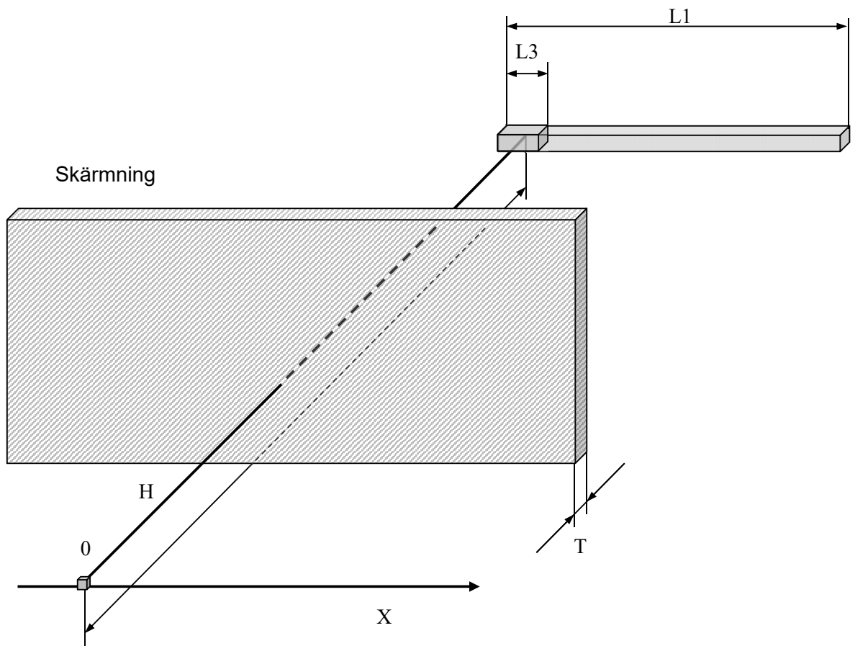

Om ni kör cellen nedan beräknas och visas dosraten som funktion av din position längs med x-axeln. Ni är alltså ute efter den maximala dosraten i denna data.

Först och främst behöver ni definiera ett antal parametrar för uträkningen. Detta gör ni i cellen nedan. Notera att om ni uppdaterar något värde måste ni köra om denna *och efterföljande* celler för att förändringen ska gälla.

In [27]:
S = 1e12       # varje segment har en intensitet på 10^6 = 1e6 fotoner per sekund per cm.
H = 200         # fyll i H (avstånd mellan källan och linjen vi mäter längs, cm)
L1 = 300      # linjekällans längd (cm)
N_segment = 60        # antal segment som linjekällan delas in i för uträkningen.
L3 = L1/N_segment    # längd på varje segment i uträkningen
T = 20         # fyll i T (skärmens tjocklek, cm)
K = 3.2e-5         # fyll i K (omvandlingsfaktor flöde -> dosrat, mSv/h per cm^-2 s^-1)
mu = 0.35        # fyll i my (linjär dämpningskoefficient för skärmens material, cm^-1)
C = 0.7         # fyll i C (parameter i Bergers ekvation)
D = 0.03         # fyll i D (parameter i Bergers ekvation)

Mätposition:
[-50. -40. -30. -20. -10.   0.  10.  20.  30.  40.  50.  60.  70.  80.
  90. 100. 110. 120. 130. 140. 150. 160. 170. 180. 190. 200. 210. 220.
 230. 240. 250. 260. 270. 280. 290. 300. 310. 320. 330. 340. 350.]
D0:
[19.37806924 22.72773992 26.3473592  30.18540328 34.176751   38.24612034
 42.31270034 46.29543757 50.11830593 53.71488807 57.03172612 60.03012365
 62.68634088 64.99036023 66.94356543 68.5557542  69.84189941 70.81901003
 71.50335082 71.90818612 72.04213654 71.90818612 71.50335082 70.81901003
 69.84189941 68.5557542  66.94356543 64.99036023 62.68634088 60.03012365
 57.03172612 53.71488807 50.11830593 46.29543757 42.31270034 38.24612034
 34.176751   30.18540328 26.3473592  22.72773992 19.37806924]


(-50.0, 350.0)

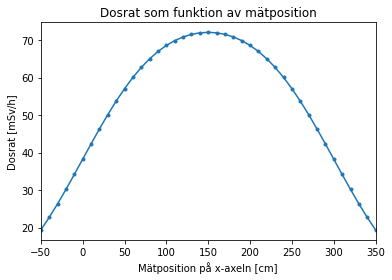

In [29]:
import numpy as np
import matplotlib.pyplot as plt



Xm = np.linspace(-50, 350, 41)        # Stegen detektorn flyttar sig längs
D0 = np.zeros(len(Xm))                # Initialisera dosraten till 0

for xm_no in range(len(Xm)):      # loopa över x-värden
    for segment_no in range(N_segment):            # Räkna ut bidraget till dosen från varje segment av källan
        Segment_mittpunkt = L3*segment_no + L3/2.     # mittpunkten för det aktuella segmentet. Detta är där "punktkällan" i approximationen ligger.

        R = np.sqrt(np.power(H, 2) + np.power(Segment_mittpunkt-Xm[xm_no], 2))
        
        X = (R/H)*T         # effektiv tjocklek av skärmen

        # Build up (Berger):
        B = 1 + C*mu*X*np.exp(D*mu*X)


    
        # Flöde (bidrag från det aktuella segmentet):
        phi_segment = (S*L3/(4.*np.pi*np.power(R, 2)))*B*np.exp(-mu*X)      # multiplicera S med segmentets längd för att få emission för hela "punktkällan"



        # Dosrat:
        D0_segment = K*phi_segment

        D0[xm_no] += D0_segment




print('Mätposition:')
print(Xm)
print('D0:')
print(D0)

# Rita graf över dosraten som funktion av mätposition på x-axeln
plt.plot(Xm, D0, marker='.')
plt.xlabel('Mätposition på x-axeln [cm]')
plt.ylabel('Dosrat [mSv/h]')
plt.title('Dosrat som funktion av mätposition')
plt.xlim(-50, 350)
    


I utdatan ovan ser ni de beräknade dosraterna vid de givna värdena på mätpositionen. Variera skärmens tjocklek $T$ i koden ovan tills den maximala dosraten är 50 mSv/h. För in de resulterande värdena på $T$ i tabellen nedan. Upprepa sedan uträkningen för nästa fall av skärmmaterial. Be en lärare kontrollera dina resultat när tabellen är ifylld.

| Skärmens material | Skärmtjocklek för en maximal dosrat på 50 mSv/h [cm] |
| ----------------- | ---------------------------------------------------- |
| Bly               |                                                      |
| Järn              |                                                      |
| Betong            |                                                      |

# Ytkälla
I den här tredje uppgiften ska vi bestämma dosraten från en cirkulär, plan källa (ytkälla) med given styrka (intensitet) och $\gamma$-energi.

På samma sätt som med linjekällan kommer vi kommer att beskriva ytkällan som ett antal "punktkällor" som fyller ut en cirkulär yta. Från varje segment kan vi räkna ut dosraten enligt föregående uppgift(er). Det som återstår är då att summera bidragen från samtliga segment i mätpunkten.